# The univariate kernel density estimation (`Kde1d`) API

This notebook demonstrates the usage of the `Kde1d` class from `pyvinecopulib` for various types of kernel density estimation tasks. Each section includes data generation, model fitting, evaluation, and visualization:

1. **Unbounded continuous data**: Standard kernel density estimation with automatic bandwidth selection
2. **Bounded continuous data**: Boundary-corrected estimation with custom degree parameters  
3. **Discrete data**: Specialized estimation for integer-valued data
4. **Zero-inflated data**: Handling excess zeros with mixed continuous-discrete models
5. **Weighted estimation**: Incorporating observation weights in the estimation process
6. **Simulation and inference**: Generating samples and computing quantiles from fitted densities

### Key Features

- Automatic boundary correction for bounded data
- Support for different polynomial degrees
- Automatic bandwidth selection
- Comprehensive statistical interface (pdf, cdf, quantile, simulate, plot)


## Setup and Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pyvinecopulib as pv

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots
plt.style.use("default")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 11

print("Libraries imported successfully!")
print(f"pyvinecopulib version: {pv.__version__}")

Libraries imported successfully!
pyvinecopulib version: 0.7.4


## 1. Unbounded Continuous Data

Let's start with the simplest case: unbounded continuous data using a normal distribution.

In [ ]:
# Generate normal data
x_normal = np.random.normal(0, 1, 500)

# Create and fit Kde1d object
kde_normal = pv.Kde1d()  # Default constructor for continuous unbounded data
kde_normal.fit(x_normal)

print(f"Kde1d fitted to normal data: {kde_normal}")
print(f"Log-likelihood: {kde_normal.loglik:.4f}")
print(f"Effective degrees of freedom: {kde_normal.edf:.2f}")

# Evaluate density at specific points
eval_points = np.array([0.0, -1.0, 1.0, -2.0, 2.0])
density_values = kde_normal.pdf(eval_points)

print("\nDensity evaluation:")
for point, density in zip(eval_points, density_values):
  true_density = stats.norm.pdf(point)  # True normal density for comparison
  print(
    f"x = {point:4.1f}: estimated = {density:.4f}, true = {true_density:.4f}, diff = {abs(density - true_density):.4f}"
  )

Kde1d fitted to normal data: <pyvinecopulib.Kde1d> Kde1d(xmin=nan, xmax=nan, type='continuous', bandwidth=0.763029, multiplier=1, degree=2)
Number of grid points: 401
Log-likelihood: -696.9225
Effective degrees of freedom: 7.00

Density evaluation:
x =  0.0: estimated = 0.4084, true = 0.3989, diff = 0.0095
x = -1.0: estimated = 0.2512, true = 0.2420, diff = 0.0092
x =  1.0: estimated = 0.2350, true = 0.2420, diff = 0.0070
x = -2.0: estimated = 0.0428, true = 0.0540, diff = 0.0112
x =  2.0: estimated = 0.0526, true = 0.0540, diff = 0.0014


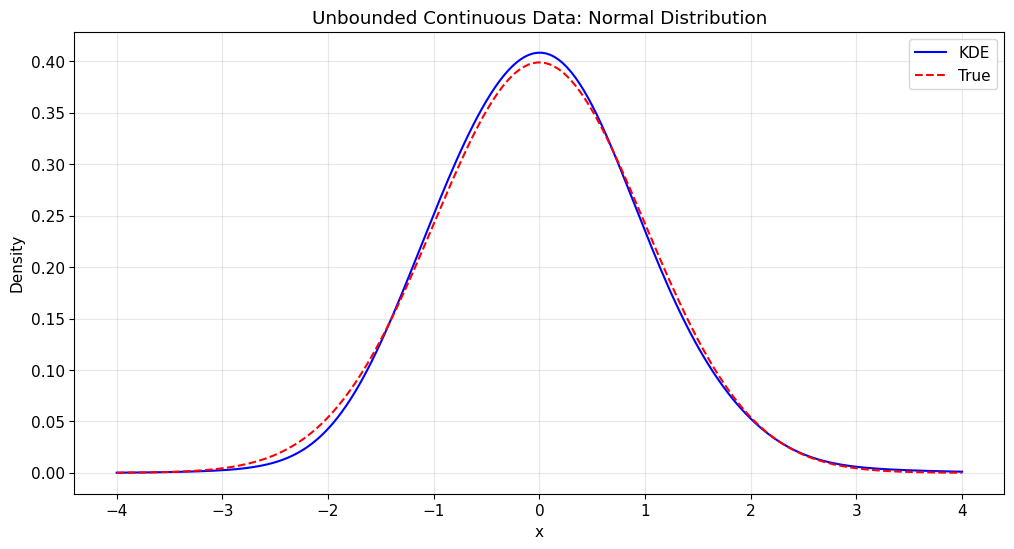

In [12]:
# Plot the density estimate
plt.figure(figsize=(12, 6))
# Add true density for comparison
x_range = np.linspace(-4, 4, 200)
true_density = stats.norm.pdf(x_range)
kde_density = kde_normal.pdf(x_range)
plt.plot(x_range, kde_density, "b-", label="KDE")
plt.plot(x_range, true_density, "r--", label="True")
plt.title("Unbounded Continuous Data: Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Bounded Continuous Data

Now let's work with bounded data using gamma and beta distributions.

In [15]:
# Generate gamma and betadata
x_gamma = np.random.gamma(shape=1, scale=1, size=500)
x_beta = np.random.beta(a=2, b=5, size=500)

# Create Kde1d for bounded data (gamma distribution)
# Set xmin=0 since gamma distribution is defined on [0, ∞)
kde_gamma = pv.Kde1d(xmin=0)
kde_gamma.fit(x_gamma)

print(f"Kde1d fitted to gamma data (bounded at 0): {kde_gamma}")
print(f"Log-likelihood: {kde_gamma.loglik:.4f}")
print(f"Effective degrees of freedom: {kde_gamma.edf:.2f}")

# Create Kde1d for bounded data (beta distribution)
# Set xmin=0 and xmax=1 since beta distribution is defined on [0, 1]
kde_beta = pv.Kde1d(xmin=0, xmax=1)
kde_beta.fit(x_beta)

print(f"Kde1d fitted to beta data (bounded between 0 and 1): {kde_beta}")
print(f"Log-likelihood: {kde_beta.loglik:.4f}")
print(f"Effective degrees of freedom: {kde_beta.edf:.2f}")

Kde1d fitted to gamma data (bounded at 0): <pyvinecopulib.Kde1d> Kde1d(xmin=0, xmax=nan, type='continuous', bandwidth=0.813595, multiplier=1, degree=2)
Log-likelihood: -491.5955
Effective degrees of freedom: 7.68
Kde1d fitted to beta data (bounded between 0 and 1): <pyvinecopulib.Kde1d> Kde1d(xmin=0, xmax=1, type='continuous', bandwidth=0.36799, multiplier=1, degree=2)
Log-likelihood: 235.5237
Effective degrees of freedom: 6.12


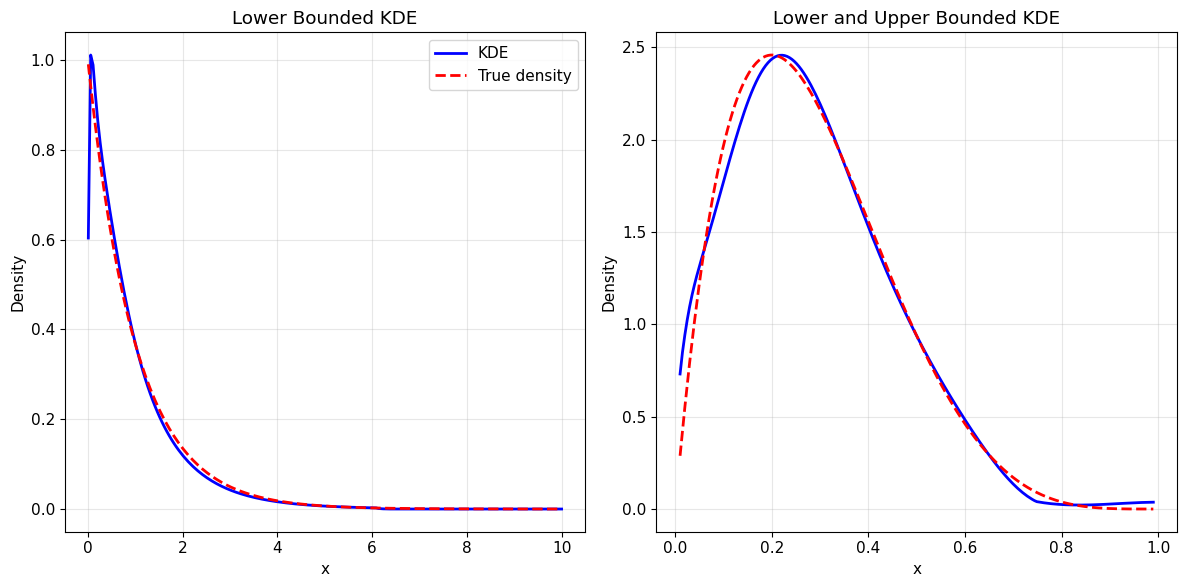

In [18]:
# Overlay true density for comparison - Manual plotting approach
eps = 1e-2  # Small epsilon to avoid boundary issues
x_range_gamma = np.linspace(0 + eps, 10, 200)
true_density_gamma = stats.gamma.pdf(x_range_gamma, a=1)  # True gamma density
kde_density_gamma = kde_gamma.pdf(x_range_gamma)
x_range_beta = np.linspace(0 + eps, 1 - eps, 200)
true_density_beta = stats.beta.pdf(x_range_beta, a=2, b=5)  # True beta density
kde_density_beta = kde_beta.pdf(x_range_beta)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(x_range_gamma, kde_density_gamma, "b-", linewidth=2, label="KDE")
plt.plot(
  x_range_gamma, true_density_gamma, "r--", linewidth=2, label="True density"
)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Lower Bounded KDE")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_range_beta, kde_density_beta, "b-", linewidth=2, label="KDE")
plt.plot(
  x_range_beta, true_density_beta, "r--", linewidth=2, label="True density"
)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Lower and Upper Bounded KDE")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Discrete Data

For discrete data, we need to specify the type as "discrete" and set appropriate bounds.

In [20]:
# Generate discrete data (binomial distribution)
x_binomial = np.random.binomial(n=5, p=0.5, size=500)

# Create Kde1d for discrete data
# Set type="discrete" and specify bounds [0, 5] since binomial(n=5) has support on {0,1,2,3,4,5}
kde_discrete = pv.Kde1d(xmin=0, xmax=5, type="discrete")
kde_discrete.fit(x_binomial)

print(f"Kde1d fitted to discrete data (binomial): {kde_discrete}")
print(f"Log-likelihood: {kde_discrete.loglik:.4f}")
print(f"Effective degrees of freedom: {kde_discrete.edf:.2f}")

# Evaluate density at integer points (the support of binomial distribution)
eval_points_discrete = np.array([0, 1, 2, 3, 4, 5])
density_discrete = kde_discrete.pdf(eval_points_discrete.astype(float))

print("\nDensity evaluation for discrete data:")
print("Point | Estimated | True (Binom) | Empirical Frequency")
print("------|-----------|--------------|---------------")
frequency_counts = np.bincount(x_binomial, minlength=6)
empirical_frequencies = frequency_counts / len(x_binomial)
for point in eval_points_discrete:
  estimated = kde_discrete.pdf(np.array([float(point)]))[0]
  true_density = stats.binom.pmf(point, n=5, p=0.5)
  count = np.sum(x_binomial == point)
  print(
    f"  {point}   |   {estimated:.4f}  |    {true_density:.4f}    |      {empirical_frequencies[point]:.4f}"
  )

Kde1d fitted to discrete data (binomial): <pyvinecopulib.Kde1d> Kde1d(xmin=0, xmax=5, type='discrete', bandwidth=1.11374, multiplier=1, degree=2)
Log-likelihood: -758.9803
Effective degrees of freedom: 4.02

Density evaluation for discrete data:
Point | Estimated | True (Binom) | Empirical Frequency
------|-----------|--------------|---------------
  0   |   0.0375  |    0.0312    |      0.0360
  1   |   0.1642  |    0.1562    |      0.1640
  2   |   0.3173  |    0.3125    |      0.3160
  3   |   0.3094  |    0.3125    |      0.3140
  4   |   0.1451  |    0.1562    |      0.1440
  5   |   0.0266  |    0.0312    |      0.0260


## 4. Zero-Inflated Data

Zero-inflated data requires special treatment using the "zero-inflated" type to handle the excess zeros.

In [26]:
# Generate zero-inflated data (exponential with added zeros)
x_zi = np.random.exponential(scale=1, size=500)
zero_indices = np.random.choice(500, size=200, replace=False)
x_zi[zero_indices] = 0

# Create Kde1d for zero-inflated data
# Set type="zero-inflated" and xmin=0 since we know the data is non-negative
kde_zi = pv.Kde1d(xmin=0, type="zero-inflated")
kde_zi.fit(x_zi)

print(f"Kde1d fitted to zero-inflated data: {kde_zi}")
print(f"Log-likelihood: {kde_zi.loglik:.4f}")
print(f"Effective degrees of freedom: {kde_zi.edf:.2f}")
print(f"Probability at zero (prob0): {kde_zi.prob0:.4f}")


# Evaluate density at specific points including zero
eval_points_zi = np.array([0.0, 0.5, 1.0, 2.0, 4.0, 6.0])
density_zi = kde_zi.pdf(eval_points_zi)

print("\nDensity evaluation for zero-inflated data:")
for point, density in zip(eval_points_zi, density_zi):
  if point == 0:
    print(f"x = {point:4.1f}: estimated = {density:.4f} (includes point mass)")
  else:
    # True density for continuous part: 0.6 * exp(-x/2) / 2
    true_continuous = 0.6 * stats.expon.pdf(point, scale=2)
    print(
      f"x = {point:4.1f}: estimated = {density:.4f}, true continuous = {true_continuous:.4f}"
    )

Kde1d fitted to zero-inflated data: <pyvinecopulib.Kde1d> Kde1d(xmin=0, xmax=nan, type='zero-inflated', bandwidth=0.768109, multiplier=1, degree=2)
Log-likelihood: -628.2624
Effective degrees of freedom: 8.48
Probability at zero (prob0): 0.4000

Density evaluation for zero-inflated data:
x =  0.0: estimated = 0.4000 (includes point mass)
x =  0.5: estimated = 0.4139, true continuous = 0.2336
x =  1.0: estimated = 0.2476, true continuous = 0.1820
x =  2.0: estimated = 0.0721, true continuous = 0.1104
x =  4.0: estimated = 0.0087, true continuous = 0.0406
x =  6.0: estimated = 0.0000, true continuous = 0.0149


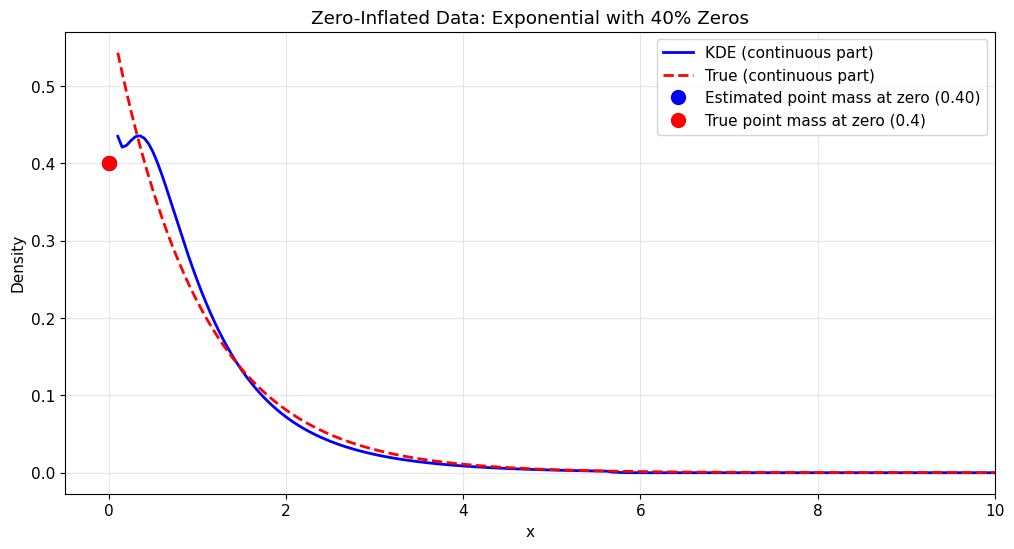

In [29]:
x_range = np.linspace(0.1, 10, 200)
kde_density_zi = kde_zi.pdf(x_range)
true_density_zi = 0.6 * stats.expon.pdf(x_range, scale=1)

# Plot the zero-inflated density estimate
plt.figure(figsize=(12, 6))

plt.plot(
  x_range, kde_density_zi, "b-", label="KDE (continuous part)", linewidth=2
)
plt.plot(
  x_range, true_density_zi, "r--", label="True (continuous part)", linewidth=2
)
# Add point mass at zero
plt.plot(
  0,
  kde_zi.prob0,
  "bo",
  markersize=10,
  label=f"Estimated point mass at zero ({kde_zi.prob0:.2f})",
  markerfacecolor="blue",
)
plt.plot(
  0,
  0.4,
  "ro",
  markersize=10,
  label="True point mass at zero (0.4)",
  markerfacecolor="red",
)

plt.title("Zero-Inflated Data: Exponential with 40% Zeros")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 10)
plt.show()

## 5. Weighted Density Estimation

Kde1d supports weighted estimation, useful for bootstrap procedures or when observations have different importance.

In [30]:
# Generate data for weighted estimation
x_weighted = np.random.normal(0, 1, 100)
weights = np.random.exponential(scale=1, size=100)  # Random weights

# Weighted estimation - fit the same data with and without weights
kde_weighted = pv.Kde1d()
kde_weighted.fit(x_weighted, weights)

kde_unweighted = pv.Kde1d()
kde_unweighted.fit(x_weighted)

print("Weighted vs. Unweighted estimation:")
print(
  f"Weighted   - Bandwidth: {kde_weighted.bandwidth:.4f}, Log-likelihood: {kde_weighted.loglik:.4f}"
)
print(
  f"Unweighted - Bandwidth: {kde_unweighted.bandwidth:.4f}, Log-likelihood: {kde_unweighted.loglik:.4f}"
)

# Compare density estimates at specific points
eval_points_weight = np.array([-2, -1, 0, 1, 2])
density_weighted = kde_weighted.pdf(eval_points_weight)
density_unweighted = kde_unweighted.pdf(eval_points_weight)

print("\nDensity comparison (weighted vs. unweighted):")
print("Point | Weighted | Unweighted | Difference")
print("------|----------|------------|------------")
for point, w_dens, uw_dens in zip(
  eval_points_weight, density_weighted, density_unweighted
):
  diff = abs(w_dens - uw_dens)
  print(f"  {point:2.0f}  |  {w_dens:.4f}  |   {uw_dens:.4f}   |   {diff:.4f}")

print(
  f"\nWeight statistics: min={weights.min():.3f}, max={weights.max():.3f}, mean={weights.mean():.3f}"
)

Weighted vs. Unweighted estimation:
Weighted   - Bandwidth: 1.0910, Log-likelihood: -126.7015
Unweighted - Bandwidth: 0.8605, Log-likelihood: -136.2553

Density comparison (weighted vs. unweighted):
Point | Weighted | Unweighted | Difference
------|----------|------------|------------
  -2  |  0.0454  |   0.0512   |   0.0058
  -1  |  0.2374  |   0.2064   |   0.0310
   0  |  0.4691  |   0.4371   |   0.0320
   1  |  0.2244  |   0.2512   |   0.0268
   2  |  0.0194  |   0.0463   |   0.0269

Weight statistics: min=0.006, max=4.020, mean=0.916


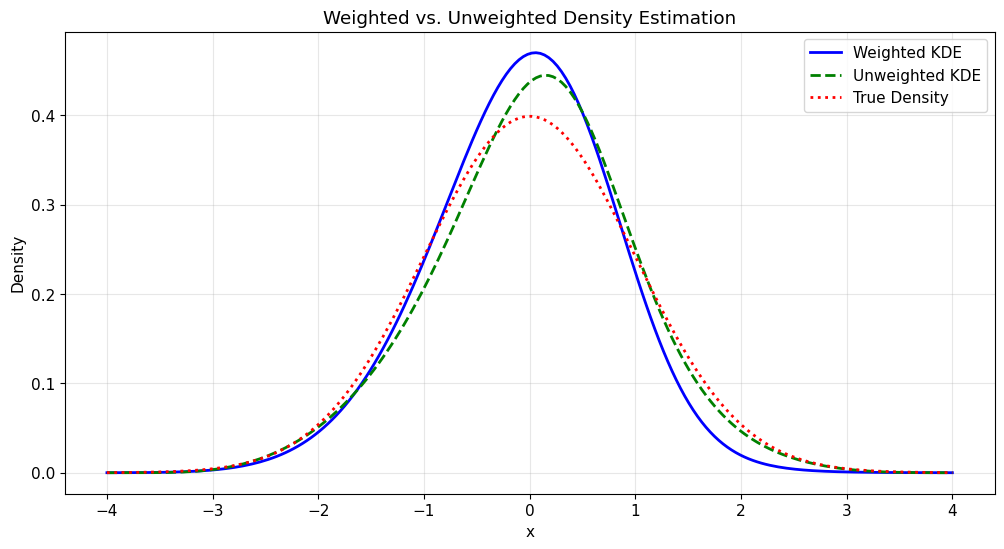

In [32]:
x_range = np.linspace(-4, 4, 200)
true_density = stats.norm.pdf(x_range)
kde_density_weighted = kde_weighted.pdf(x_range)
kde_density_unweighted = kde_unweighted.pdf(x_range)

# Plot comparison of weighted vs. unweighted estimates
plt.figure(figsize=(12, 6))
plt.plot(x_range, kde_density_weighted, "b-", label="Weighted KDE", linewidth=2)
plt.plot(
  x_range, kde_density_unweighted, "g--", label="Unweighted KDE", linewidth=2
)
plt.plot(x_range, true_density, "r:", label="True Density", linewidth=2)

plt.title("Weighted vs. Unweighted Density Estimation")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Plots, Simulation and Additional Features

The Kde1d class also supports plotting directly, simulation from the fitted density and more.

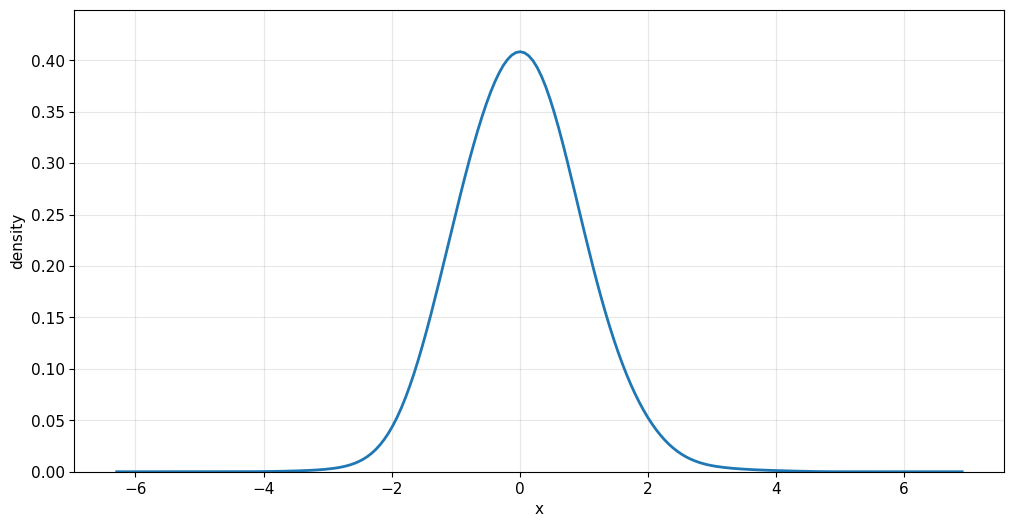

Simulation from fitted normal density:
Original data: mean=0.007, std=0.980
Simulated data: mean=0.029, std=0.922

CDF and quantile evaluation for normal kde:
CDF at [-1, 0, 1]: [0.149304   0.5003765  0.84513907]
Quantiles at [0.25, 0.5, 0.75]: [-0.65620319 -0.00092187  0.65901036]
True CDF values: [0.15865525 0.5        0.84134475]
True quantiles: [-0.67448975  0.          0.67448975]


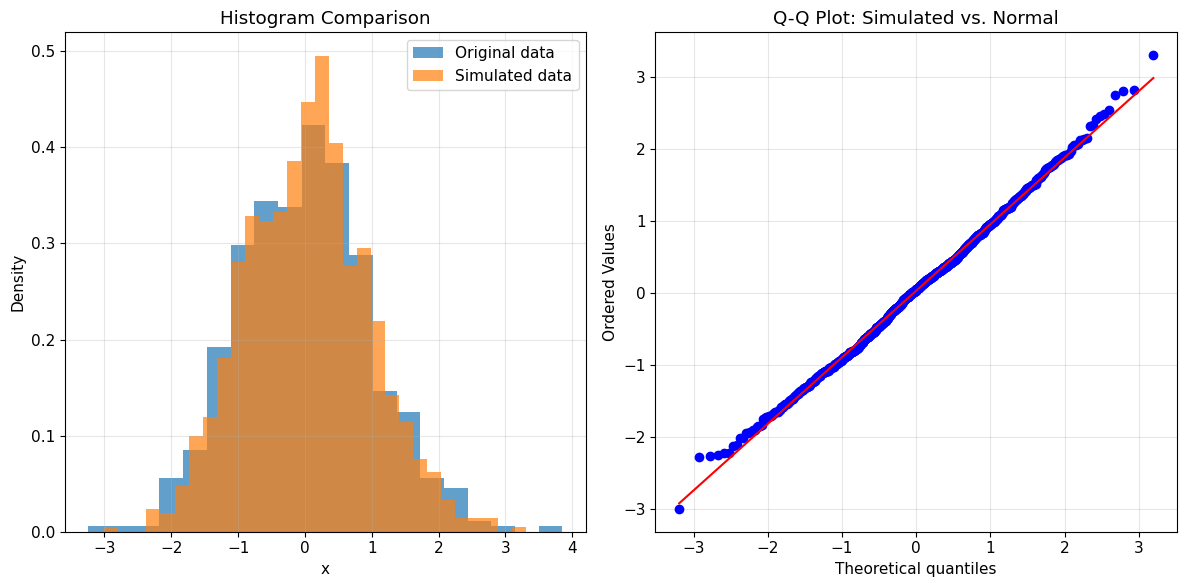

In [ ]:
kde_normal.plot()

# Simulate from fitted density
simulated_data = kde_normal.simulate(n=1000, seeds=[123])

print("Simulation from fitted normal density:")
print(f"Original data: mean={x_normal.mean():.3f}, std={x_normal.std():.3f}")
print(
  f"Simulated data: mean={simulated_data.mean():.3f}, std={simulated_data.std():.3f}"
)

# CDF and quantile functions
print("\nCDF and quantile evaluation for normal kde:")
test_points = np.array([-1, 0, 1])
cdf_values = kde_normal.cdf(test_points)
print(f"CDF at [-1, 0, 1]: {cdf_values}")

quantiles = np.array([0.25, 0.5, 0.75])
quantile_values = kde_normal.quantile(quantiles)
print(f"Quantiles at [0.25, 0.5, 0.75]: {quantile_values}")

# True values for comparison
true_cdf = stats.norm.cdf(test_points)
true_quantiles = stats.norm.ppf(quantiles)
print(f"True CDF values: {true_cdf}")
print(f"True quantiles: {true_quantiles}")

# Plot histogram of simulated data vs. original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(x_normal, bins=20, density=True, alpha=0.7, label="Original data")
plt.hist(
  simulated_data, bins=30, density=True, alpha=0.7, label="Simulated data"
)
plt.title("Histogram Comparison")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)

# Q-Q plot
stats.probplot(simulated_data, dist=stats.norm, plot=plt)
plt.title("Q-Q Plot: Simulated vs. Normal")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()